Bibliotecas Importadas

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from datetime import datetime, time

In [ ]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-15 16:53:32


Carregando os dados

In [ ]:
path_treino = 'drive/MyDrive/Colab Notebooks/Deep Learning/fruits-360/Training' 
path_teste = 'drive/MyDrive/Colab Notebooks/Deep Learning/fruits-360/Test'

In [ ]:
def get_dados(path):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = img_to_array(load_img(arquivo, target_size=(100, 100)))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [ ]:
X_frutas, Y_frutas = get_dados(path_teste)

0 - Apple Braeburn
1 - Apple Golden 2
2 - Apple Granny Smith
3 - Apple Crimson Snow
4 - Apple Golden 1
5 - Apple Golden 3
6 - Apple Red 1
7 - Apple Pink Lady
8 - Apple Red 3
9 - Apple Red 2
10 - Apple Red Yellow 1
11 - Avocado
12 - Banana Lady Finger
13 - Apricot
14 - Avocado ripe
15 - Banana
16 - Apple Red Delicious
17 - Apple Red Yellow 2
18 - Beetroot
19 - Banana Red
20 - Blueberry
21 - Cactus fruit
22 - Carambula
23 - Cherry Wax Black
24 - Cherry 1
25 - Cantaloupe 1
26 - Cherry 2
27 - Cherry Rainier
28 - Cauliflower
29 - Cantaloupe 2
30 - Cherry Wax Red
31 - Cherry Wax Yellow
32 - Clementine
33 - Eggplant
34 - Ginger Root
35 - Grape Blue
36 - Chestnut
37 - Cocos
38 - Granadilla
39 - Dates
40 - Grape Pink
41 - Grape White
42 - Grapefruit Pink
43 - Huckleberry
44 - Grape White 3
45 - Grape White 4
46 - Hazelnut
47 - Grapefruit White
48 - Grape White 2
49 - Guava
50 - Kaki
51 - Kiwi
52 - Kumquats
53 - Kohlrabi
54 - Mangostan
55 - Mango
56 - Mandarine
57 - Mango Red
58 - Lemon Meyer
59

In [ ]:
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)

In [ ]:
X_train.shape

(20622, 100, 100, 3)

In [ ]:
X_train = X_train.astype('float32')/255
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [ ]:
Y_train.shape

(20622,)

In [ ]:
num_frutas = len(list(set(Y_train)))
print(num_frutas)
Y_train = to_categorical(Y_train, num_frutas)

120


In [ ]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(512, (10, 10), input_shape=(100, 100, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(256, (10, 10), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Remove 20% das ativações de entrada aleatoriamente 
model.add(Dropout(0.2))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print(model.output_shape)
model.add(Dense(500, activation='sigmoid'))
print(model.output_shape)
model.add(Dense(480, activation='sigmoid'))
print(model.output_shape)
model.add(Dense(240, activation='sigmoid'))
print(model.output_shape)
#Função de Ativação Softmax
model.add(Dense(num_frutas, activation='softmax'))
print(model.output_shape)

(None, 91, 91, 512)
(None, 45, 45, 512)
(None, 36, 36, 256)
(None, 18, 18, 256)
(None, 82944)
(None, 500)
(None, 480)
(None, 240)
(None, 120)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=10, batch_size=100)

Epoch 1/10
165/165 [==============================] - 243s 1s/step - loss: 4.6557 - accuracy: 0.0159 - val_loss: 8.8285 - val_accuracy: 0.0000e+00
Epoch 2/10
165/165 [==============================] - 172s 1s/step - loss: 4.5830 - accuracy: 0.0134 - val_loss: 9.5043 - val_accuracy: 0.0000e+00
Epoch 3/10
165/165 [==============================] - 173s 1s/step - loss: 4.5761 - accuracy: 0.0163 - val_loss: 10.0469 - val_accuracy: 0.0000e+00
Epoch 4/10
165/165 [==============================] - 173s 1s/step - loss: 4.5749 - accuracy: 0.0172 - val_loss: 10.5074 - val_accuracy: 0.0000e+00
Epoch 5/10
165/165 [==============================] - 173s 1s/step - loss: 4.5730 - accuracy: 0.0198 - val_loss: 10.8114 - val_accuracy: 0.0000e+00
Epoch 6/10
165/165 [==============================] - 172s 1s/step - loss: 4.5742 - accuracy: 0.0174 - val_loss: 11.0864 - val_accuracy: 0.0000e+00
Epoch 7/10
165/165 [==============================] - 172s 1s/step - loss: 4.5697 - accuracy: 0.0201 - val_loss: 1

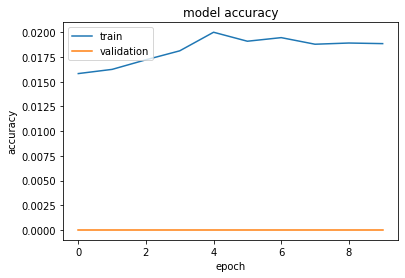

In [ ]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def plot_history(history):
      acc = history.history['accuracy']    val_acc = history.history['val_accuracy']    loss = history.history['loss']    val_loss = history.history['val_loss']    x = range(1, len(acc) + 1)    plt.figure(figsize=(12, 5))    plt.subplot(1, 2, 1)    plt.plot(x, acc, 'b', label='Training Accuracy')    plt.plot(x, val_acc, 'r', label='Validation Accuracy')    plt.title('Training and validation Accuracy')    plt.subplot(1, 2, 2)    plt.plot(x, loss, 'b', label='Training loss')    plt.plot(x, val_loss, 'r', label='Validation loss')    plt.title('Training and validation loss')    plt.legend()



In [ ]:
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]))

Erro da CNN: 98.41%
Acurária da CNN: 0.02%


In [ ]:
X_frutas, Y_frutas = get_dados(path_teste)

0 - Apple Braeburn
1 - Apple Golden 2
2 - Apple Granny Smith
3 - Apple Crimson Snow
4 - Apple Golden 1
5 - Apple Golden 3
6 - Apple Red 1
7 - Apple Pink Lady
8 - Apple Red 3
9 - Apple Red 2
10 - Apple Red Yellow 1
11 - Avocado
12 - Banana Lady Finger
13 - Apricot
14 - Avocado ripe
15 - Banana
16 - Apple Red Delicious
17 - Apple Red Yellow 2
18 - Beetroot
19 - Banana Red
20 - Blueberry
21 - Cactus fruit
22 - Carambula
23 - Cherry Wax Black
24 - Cherry 1
25 - Cantaloupe 1
26 - Cherry 2
27 - Cherry Rainier
28 - Cauliflower
29 - Cantaloupe 2
30 - Cherry Wax Red
31 - Cherry Wax Yellow
32 - Clementine
33 - Eggplant
34 - Ginger Root
35 - Grape Blue
36 - Chestnut
37 - Cocos
38 - Granadilla
39 - Dates
40 - Grape Pink
41 - Grape White
42 - Grapefruit Pink
43 - Huckleberry
44 - Grape White 3
45 - Grape White 4
46 - Hazelnut
47 - Grapefruit White
48 - Grape White 2
49 - Guava
50 - Kaki
51 - Kiwi
52 - Kumquats
53 - Kohlrabi
54 - Mangostan
55 - Mango
56 - Mandarine
57 - Mango Red
58 - Lemon Meyer
59

In [ ]:
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)

In [ ]:
X_test = X_test.astype('float32')/255

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]))

In [ ]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))